# Étude de marché - *Suite*

*La poule qui chante, une entreprise française d’agroalimentaire souhaite se développer à l'international. L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !*

**Objectif de cette étude :** Obtenir une liste de pays dans lesquels la société pourrait potentiellement s'exporter

Dans cette seconde partie, nous allons utiliser les données recueillies sur le site de la FAO et traitées en première partie afin de réaliser une classification ascendante hiérarchique et une analyse en composantes principales.

In [1]:
# Import des librairies et des fonctions nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.stats import f_oneway
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Chargement de nos données traitées

Commençons par importer les données que nous avons traitées dans la première partie de notre étude.

In [2]:
# Import et visualisation du fichier des données traitées

dispo_pop = pd.read_csv('data_preprocessed.csv', index_col=0)
dispo_pop.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion protéines animales (%),Taux évolution moyen population (%),PIB moyen/habitant ($),Quantité moyenne poulets importée ($),Région_Afrique,Région_Amérique du nord,Région_Amérique du sud,Région_Asie du Sud,Région_Europe,Région_Europe - UE,Région_Méditerranée orientale,Région_Pacifique occidental
0,Afghanistan,1997.0,54.09,19.52,2.98,553.52,9135200.0,0,0,0,0,0,0,1,0
1,Afrique du Sud,2987.0,83.36,41.46,1.51,6076.57,7425600.0,1,0,0,0,0,0,0,0
2,Albanie,3400.0,119.50,55.50,-0.17,4306.02,5066400.0,0,0,0,0,1,0,0,0
3,Algérie,3345.0,92.85,27.68,2.06,4645.34,21107000.0,1,0,0,0,0,0,0,0
4,Allemagne,3559.0,104.07,60.61,0.45,44308.71,173673000.0,0,0,0,0,0,1,0,0


In [3]:
# Coup d'oeil sur les données

dispo_pop.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion protéines animales (%),Taux évolution moyen population (%),PIB moyen/habitant ($),Quantité moyenne poulets importée ($),Région_Afrique,Région_Amérique du nord,Région_Amérique du sud,Région_Asie du Sud,Région_Europe,Région_Europe - UE,Région_Méditerranée orientale,Région_Pacifique occidental
count,166.000000,166.000000,166.000000,166.000000,166.000000,1.660000e+02,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,2860.475904,81.183916,42.737651,1.332711,13876.178072,1.345679e+07,0.240964,0.126506,0.078313,0.054217,0.138554,0.162651,0.096386,0.102410
std,454.719743,20.148292,16.039235,1.204405,19206.714725,5.408410e+07,0.428962,0.333425,0.269477,0.227130,0.346526,0.370163,0.296012,0.304104
min,1754.000000,39.910000,8.910000,-1.380000,406.860000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2515.500000,64.315000,28.927500,0.457500,2021.692500,5.276500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2867.500000,81.150000,43.735000,1.200000,6093.015000,3.023500e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3250.750000,96.067500,56.892500,2.200000,17190.962500,7.960900e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3770.000000,141.340000,73.330000,5.520000,113672.390000,6.149210e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Affichage du nombre de pays disponibles dans le dataframe

dispo_pop.shape

(166, 15)

Nous avons actuellement une liste de 166 pays dans lesquels l'entreprise pourrait potentiellement exporter. Cette liste étant trop importante, l'analyse pays par pays serait trop complexe et trop longue. Afin de faciliter ladite analyse, nous allons regrouper les pays ayant des caractéristiques similaires. Nous pourrons ensuite analyser les groupes entre eux.

### Recherche d'une corrélation entre les variables

Il serait intéressant de voir si certaines variables sont corrélées entre elles. Commençons par réaliser une matrice des corrélations afin de voir si c'est le cas.

<AxesSubplot:>

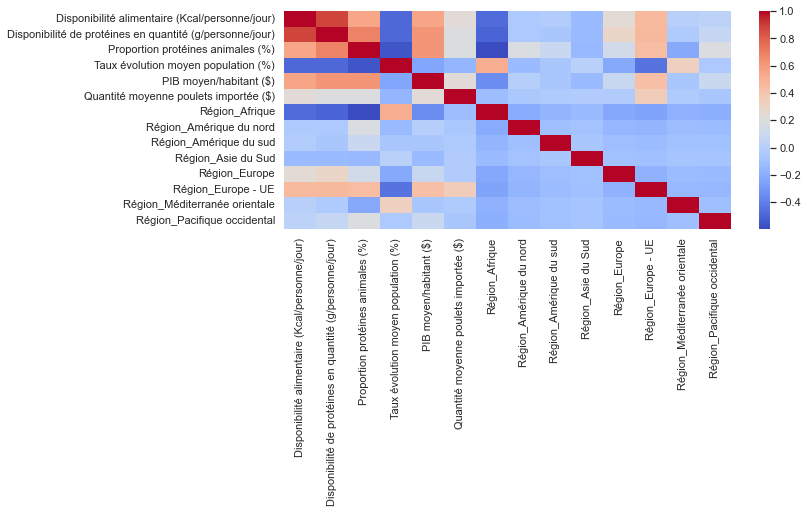

In [5]:
# Réalisation d'une matrice des corrélations

sns.set(rc={'figure.figsize':(10,4)})
dispo_pop_corr = dispo_pop.corr()
sns.heatmap(dispo_pop_corr, xticklabels = dispo_pop_corr.columns , 
                 yticklabels = dispo_pop_corr.columns, cmap = 'coolwarm')

Il existe effectivement une corrélation plus ou moins importante entre certaines variables. Dans certains cas, cette corrélation est assez intuitive (c'est par exemple le cas pour les disponibilités alimentaires et les régions, ou encore les disponibilités alimentaires et le PIB moyen par habitant).
Nous pouvons maintenant passer à la classification de nos données.

### Classification ascendante hiérarchique (CAH)

In [6]:
# Posons les pays comme index et transformons notre jeu de données en array Numpy

data = dispo_pop
data.set_index('Zone', inplace=True)
X = data.iloc[:,[0, 1, 2, 4, 5]].values
print('X', X.shape)

X (166, 5)


In [7]:
# Centrage et réduction des données

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

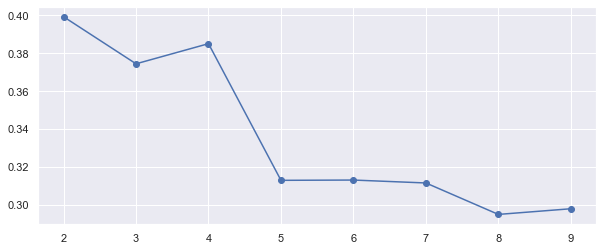

In [8]:
# Établissement du nombre de clusters optimal à l'aide de la métrique "silhouettes" 

silhouettes = [] 
for num_clusters in range(2, 10): 
    cls = KMeans(n_clusters=num_clusters, random_state=1512)  
    cls.fit(X_scaled)
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)
    
plt.plot(range(2, 10), silhouettes, marker='o')
plt.show()

D'après la métrique "silhouette", il serait optimal de répartir nos 166 pays en 4 groupes.

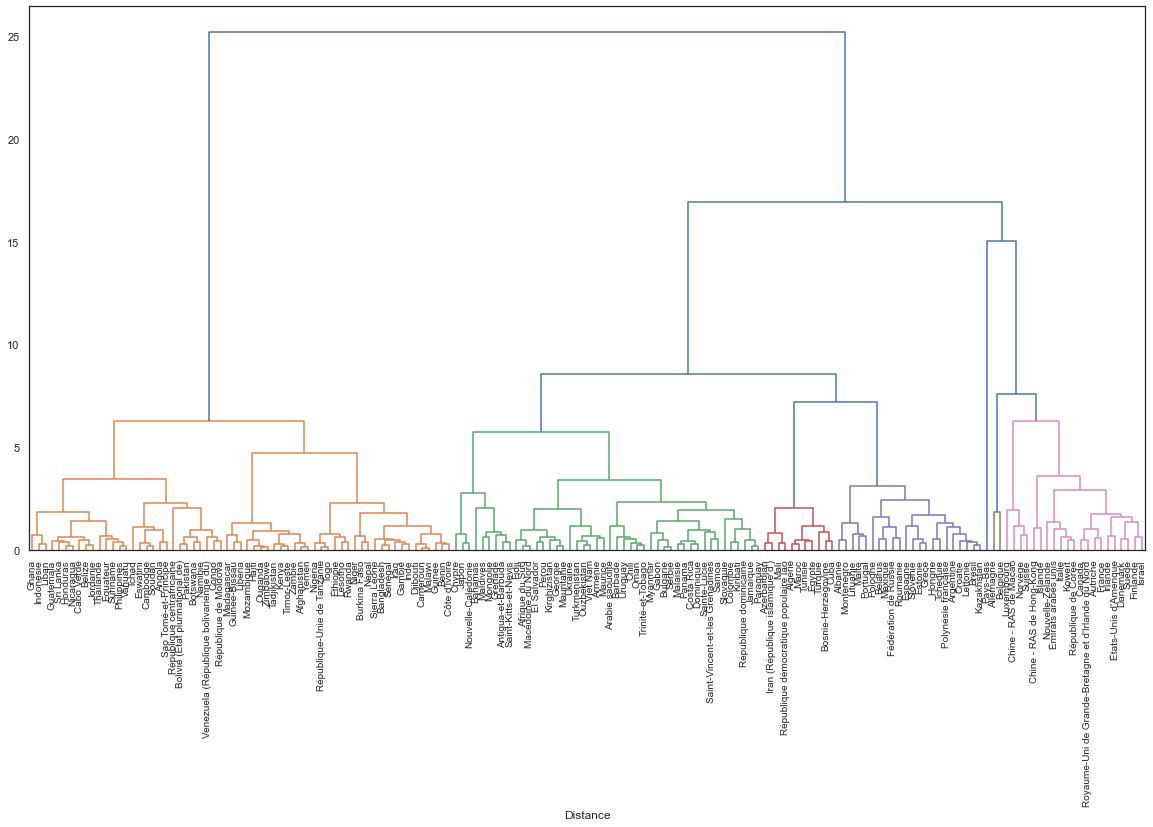

In [9]:
# Création d'un dendrogramme global

Z = linkage(X_scaled, method = 'ward', metric = 'euclidean')
fig = plt.figure(figsize=(20,10))
sns.set_style('white')
plt.xlabel('Distance')

dendrogram(Z, labels = data.index, leaf_font_size=10, color_threshold=7, orientation='top')
plt.savefig("Dendrogramme.png")
plt.show()

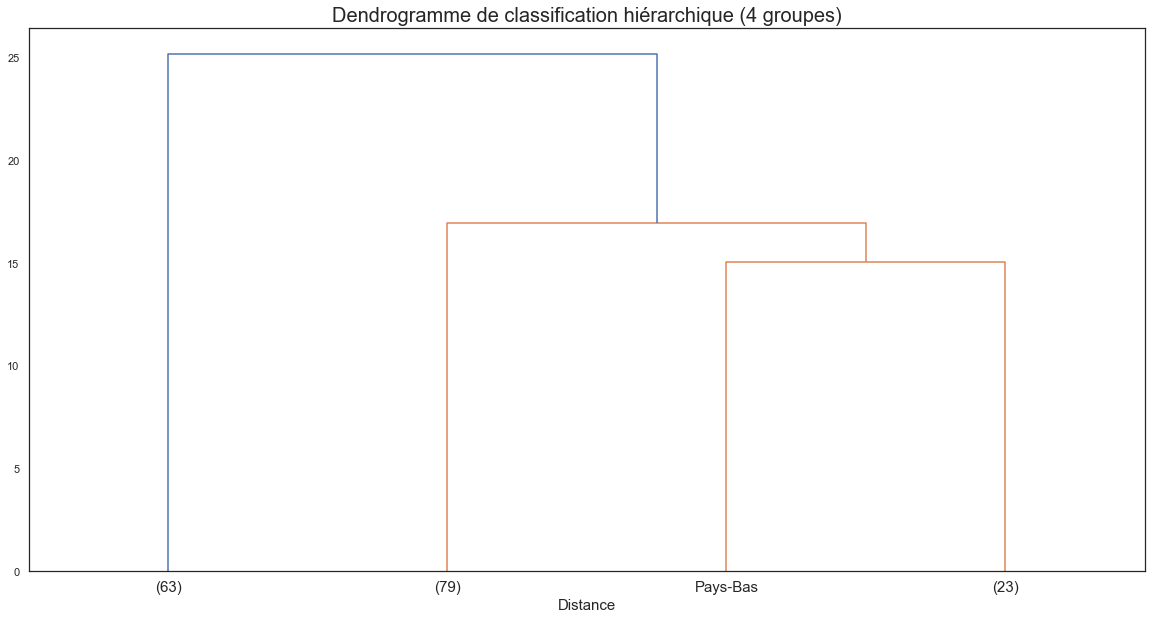

In [10]:
# Découpage du dendrogramme en 4 groupes pour avoir une première idée du partitionnement

fig = plt.figure(figsize=(20,10))
plt.title('Dendrogramme de classification hiérarchique (4 groupes)', fontsize=20)
plt.xlabel('Distance', fontsize=15)

dendrogram(Z, labels = data.index, p=4, truncate_mode='lastp', leaf_font_size=15, orientation='top')
plt.savefig("Dendrogramme_4groupes.png")
plt.show()

Nous avons obtenu la répartition des 166 pays en 4 groupes. Voyons maintenant ce qui caractérise chacun de ces groupes.

In [11]:
# Nommage des différents groupes qui se distinguent

groupes = fcluster(Z, 4, criterion='maxclust')
print('Nous pourrons maintenant identifier les groupes en tant que ' + str(np.unique(groupes)))

Nous pourrons maintenant identifier les groupes en tant que [1 2 3 4]


In [12]:
# Tri des index des groupes afin d'obtenir une classification ascendante hiérarchique
# Affichage des pays dans leurs groupes et renommage de la colonne index en "Groupe"

index_groupes = np.argsort(groupes)
data_gp = pd.DataFrame(data.index[index_groupes], groupes[index_groupes]).reset_index()
data_gp = data_gp.rename(columns={'index':'Groupe'})
data_gp.head()

,Groupe,Zone
0,1,Afghanistan
1,1,Nigéria
2,1,Niger
3,1,Nicaragua
4,1,Namibie


Nous pouvons maintenant joindre le dataframe que nous venons d'obtenir à dispo_pop afin d'en faciliter l'agrégation.

In [13]:
# Jointure entre dispo_pop et data_gp

data_gp = pd.merge(dispo_pop, data_gp, on='Zone')
data_gp.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion protéines animales (%),Taux évolution moyen population (%),PIB moyen/habitant ($),Quantité moyenne poulets importée ($),Région_Afrique,Région_Amérique du nord,Région_Amérique du sud,Région_Asie du Sud,Région_Europe,Région_Europe - UE,Région_Méditerranée orientale,Région_Pacifique occidental,Groupe
0,Afghanistan,1997.0,54.09,19.52,2.98,553.52,9135200.0,0,0,0,0,0,0,1,0,1
1,Afrique du Sud,2987.0,83.36,41.46,1.51,6076.57,7425600.0,1,0,0,0,0,0,0,0,2
2,Albanie,3400.0,119.50,55.50,-0.17,4306.02,5066400.0,0,0,0,0,1,0,0,0,2
3,Algérie,3345.0,92.85,27.68,2.06,4645.34,21107000.0,1,0,0,0,0,0,0,0,2
4,Allemagne,3559.0,104.07,60.61,0.45,44308.71,173673000.0,0,0,0,0,0,1,0,0,3


In [14]:
# Coup d'oeil sur les centroïdes des groupes du nouveau dataframe

data_gp.groupby('Groupe').mean()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion protéines animales (%),Taux évolution moyen population (%),PIB moyen/habitant ($),Quantité moyenne poulets importée ($),Région_Afrique,Région_Amérique du nord,Région_Amérique du sud,Région_Asie du Sud,Région_Europe,Région_Europe - UE,Région_Méditerranée orientale,Région_Pacifique occidental
Groupe,,,,,,,,,,,,,,
1,2442.396825,61.222222,27.586190,2.129048,2425.834127,3.424445e+06,0.539683,0.063492,0.079365,0.111111,0.031746,0.000000,0.126984,0.047619
2,3016.810127,88.763291,49.717975,0.823544,11018.273291,9.240657e+06,0.075949,0.189873,0.101266,0.025316,0.202532,0.202532,0.075949,0.126582
3,3451.695652,108.817391,59.272174,0.946957,53528.310000,2.926756e+07,0.000000,0.086957,0.000000,0.000000,0.217391,0.434783,0.086957,0.173913
4,3251.000000,104.430000,65.540000,0.260000,49023.290000,6.149210e+08,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


Les données relatives aux groupes 3 et 4 semblent se démarquer des autres groupes et pourraient être des cibles interressantes. Essayons de confirmer ou infirmer cette première impression.

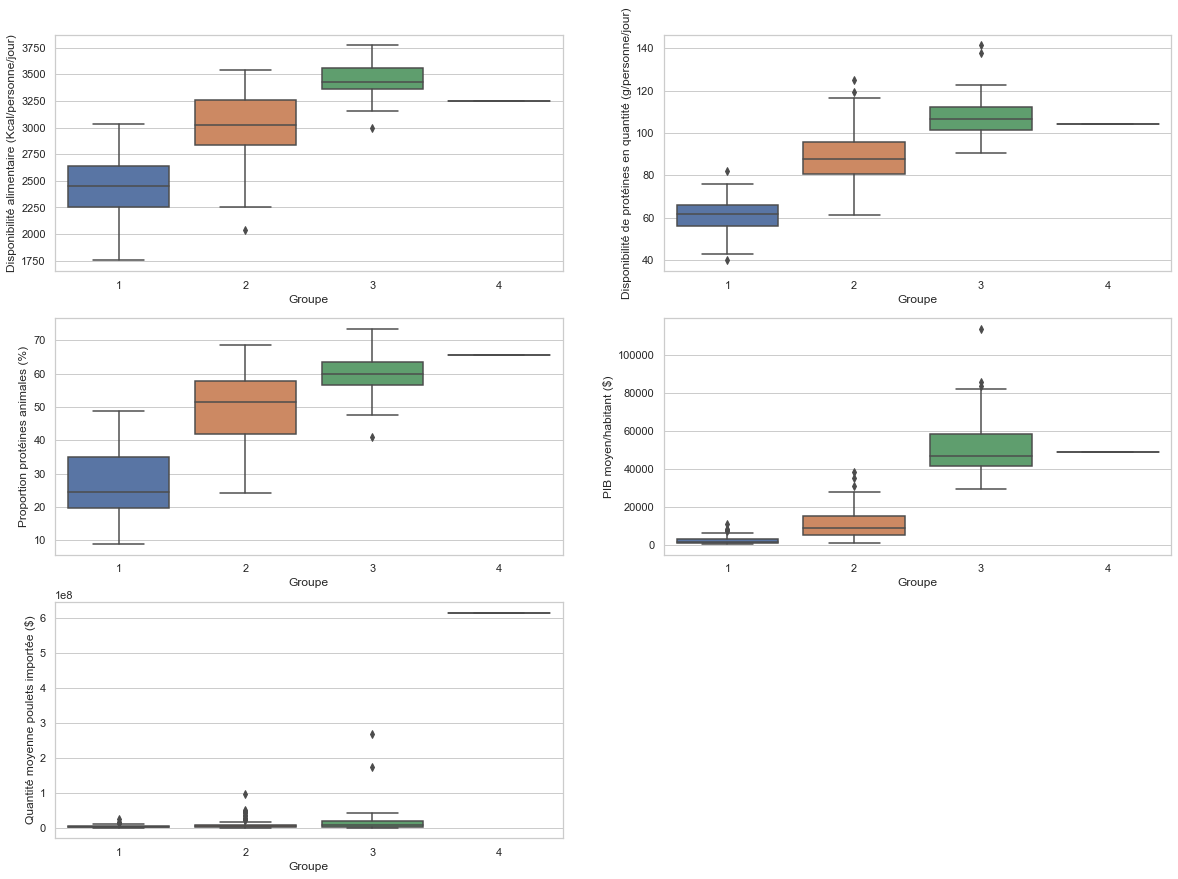

In [15]:
# Réalisation de boxplots

plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(421)
sns.boxplot(data=data_gp, x='Groupe', y='Disponibilité alimentaire (Kcal/personne/jour)')

plt.subplot(422)
sns.boxplot(data=data_gp, x='Groupe', y='Disponibilité de protéines en quantité (g/personne/jour)')

plt.subplot(423)
sns.boxplot(data=data_gp, x='Groupe', y='Proportion protéines animales (%)')

plt.subplot(424)
sns.boxplot(data=data_gp, x='Groupe', y='PIB moyen/habitant ($)')

plt.subplot(425)
sns.boxplot(data=data_gp, x='Groupe', y='Quantité moyenne poulets importée ($)')

plt.show(block=False)

Réalisons des tests statistiques afin de voir quelles variables influencent la composition des groupes. Utilisons pour ce faire l'analyse des variances ou ANOVA.

**H0 :** les moyennes des variances de tous les groupes sont égales.

**H1 :** la moyenne de la variance d'au moins l'un des groupe diffère.

In [16]:
f_oneway(data_gp[data_gp.Groupe == 1]['Disponibilité alimentaire (Kcal/personne/jour)'], data_gp[data_gp.Groupe == 2]['Disponibilité alimentaire (Kcal/personne/jour)'], data_gp[data_gp.Groupe == 3]['Disponibilité alimentaire (Kcal/personne/jour)'], data_gp[data_gp.Groupe == 4]['Disponibilité alimentaire (Kcal/personne/jour)'])

F_onewayResult(statistic=87.90757753657012, pvalue=8.27503988970834e-34)

La pvalue étant nettement inférieure à 0.05, nous pouvons rejeter H0 et admettre, par conséquent, que pour au moins l'un des groupes, sa composition n'est pas corrélée à la variable  "*Disponibilité alimentaire (Kcal/personne/jour)*".

In [17]:
f_oneway(data_gp[data_gp.Groupe == 1]['Disponibilité de protéines en quantité (g/personne/jour)'], data_gp[data_gp.Groupe == 2]['Disponibilité de protéines en quantité (g/personne/jour)'], data_gp[data_gp.Groupe == 3]['Disponibilité de protéines en quantité (g/personne/jour)'], data_gp[data_gp.Groupe == 4]['Disponibilité de protéines en quantité (g/personne/jour)'])

F_onewayResult(statistic=134.02453643664236, pvalue=1.118834446458114e-43)

La pvalue étant nettement inférieure à 0.05, nous pouvons rejeter H0 et admettre, par conséquent, que pour au moins l'un des groupes, sa composition n'est pas corrélée à la variable "*Disponibilité de protéines en quantité (g/personne/jour)*".

In [18]:
f_oneway(data_gp[data_gp.Groupe == 1]['Proportion protéines animales (%)'], data_gp[data_gp.Groupe == 2]['Proportion protéines animales (%)'], data_gp[data_gp.Groupe == 3]['Proportion protéines animales (%)'], data_gp[data_gp.Groupe == 4]['Proportion protéines animales (%)'])

F_onewayResult(statistic=78.28445134118166, pvalue=2.3893534075505825e-31)

La pvalue étant nettement inférieure à 0.05, nous pouvons rejeter H0 et admettre, par conséquent, que pour au moins l'un des groupes, sa composition n'est pas corrélée à la variable "*Proportion protéines animales (%)*".

In [19]:
f_oneway(data_gp[data_gp.Groupe == 1]['PIB moyen/habitant ($)'], data_gp[data_gp.Groupe == 2]['PIB moyen/habitant ($)'], data_gp[data_gp.Groupe == 3]['PIB moyen/habitant ($)'], data_gp[data_gp.Groupe == 4]['PIB moyen/habitant ($)'])

F_onewayResult(statistic=171.67084320960862, pvalue=4.390602141310667e-50)

La pvalue étant nettement inférieure à 0.05, nous pouvons rejeter H0 et admettre, par conséquent, que pour au moins l'un des groupes, sa composition n'est pas corrélée à la variable "*PIB moyen/habitant ($)*".

In [20]:
f_oneway(data_gp[data_gp.Groupe == 1]['Quantité moyenne poulets importée ($)'], data_gp[data_gp.Groupe == 2]['Quantité moyenne poulets importée ($)'], data_gp[data_gp.Groupe == 3]['Quantité moyenne poulets importée ($)'], data_gp[data_gp.Groupe == 4]['Quantité moyenne poulets importée ($)'])

F_onewayResult(statistic=188.6998367738318, pvalue=1.2248224924316475e-52)

La pvalue étant nettement inférieure à 0.05, nous pouvons rejeter H0 et admettre, par conséquent, que pour au moins l'un des groupes, sa composition n'est pas corrélée à la variable "*Quantité moyenne poulets importée ($)*".

#### Retour à la CAH

Effectivement nous allons conserver les groupes 3 et 4 qui se démarquent des autres groupes. Jetons un oeil sur les pays qui les composent.

In [21]:
# Affichage des pays qui pourraient potentiellement être ciblés

print(data_gp[data_gp['Groupe'] == 3]['Zone'].unique())
print(data_gp[data_gp['Groupe'] == 4]['Zone'].unique())

['Allemagne' 'Autriche' 'Belgique' 'Canada' 'Chine - RAS de Hong-Kong'
 'Chine - RAS de Macao' 'Danemark' 'Finlande' 'France' 'Irlande' 'Islande'
 'Israël' 'Italie' 'Koweït' 'Luxembourg' 'Norvège' 'Nouvelle-Zélande'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
 'République de Corée' 'Suisse' 'Suède' 'Émirats arabes unis'
 "États-Unis d'Amérique"]
['Pays-Bas']


In [22]:
# Création d'un dataframe contenant les pays de cette liste
# Suppression de la France qui n'est pas une cible

data_gp34 = data_gp[(data_gp['Groupe'] == 3) + (data_gp['Groupe'] == 4)]
data_gp34 = data_gp34[data_gp34['Zone'] != 'France']
data_gp34.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion protéines animales (%),Taux évolution moyen population (%),PIB moyen/habitant ($),Quantité moyenne poulets importée ($),Région_Afrique,Région_Amérique du nord,Région_Amérique du sud,Région_Asie du Sud,Région_Europe,Région_Europe - UE,Région_Méditerranée orientale,Région_Pacifique occidental,Groupe
4,Allemagne,3559.0,104.07,60.61,0.45,44308.71,173673000.0,0,0,0,0,0,1,0,0,3
10,Autriche,3694.0,108.11,60.01,0.76,47618.80,30920800.0,0,0,0,0,0,1,0,0,3
15,Belgique,3770.0,101.35,57.11,0.59,44256.59,268269600.0,0,0,0,0,0,1,0,0,3
28,Canada,3492.0,101.33,50.30,1.00,46601.72,42991400.0,0,1,0,0,0,0,0,0,3
30,Chine - RAS de Hong-Kong,3353.0,137.88,73.33,0.76,42759.09,3390000.0,0,0,0,0,0,0,0,1,3


In [23]:
# Affichage du nombre de pays présents dans notre échantillon

data_gp34.shape

(23, 16)

Nous avons maintenant un échantillon de 23 pays potentiellement intéressant pour y exporter des poulets.

### Utilisation de l'algorithme des K-means

In [24]:
# Conversion des données en array numpy

X2 = data.iloc[:,[0, 1, 2, 4, 5]].values

In [25]:
# Centrage et réduction des valeurs de X2

scaler = preprocessing.StandardScaler()
X2_scaled = scaler.fit_transform(X2)

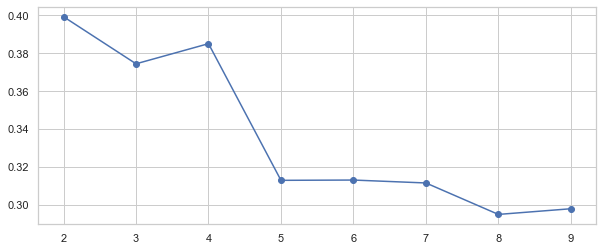

In [26]:
# Établissement du nombre de clusters optimal à l'aide de la métrique "silhouettes" 

silhouettes = [] 
for num_clusters in range(2, 10): 
    cls = KMeans(n_clusters=num_clusters, random_state=1512)  
    cls.fit(X2_scaled)
    silh = metrics.silhouette_score(X2_scaled, cls.labels_)
    silhouettes.append(silh)
    
plt.plot(range(2, 10), silhouettes, marker='o')
plt.show()

Nous allons à nouveau choisir de grouper notre échantillon en 4 clusters. Créons une liste dans laquelle nous stockerons les différentes inerties

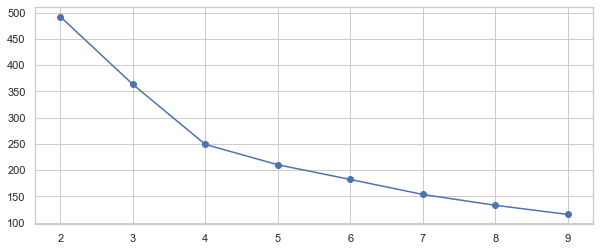

In [27]:
# Création de la liste des inerties

inerties=[]
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(X2_scaled)
    inerties.append(km.inertia_)

plt.plot(range(2, 10), inerties, marker='o')
plt.show()

La courbe des inerties nous indique bien que nous devons prendre le parti de choisir *k=4*, ce qui nous permettra de pouvoir comparer les 2 méthodes de classification avec le même nombre de classes.

Nous pouvons maintenant réaliser une analyse en composantes principales (ACP) afin de poursuivre notre étude.

In [28]:
pca = PCA(n_components=4)
pca.fit(X2_scaled)

PCA(n_components=4)

In [29]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.60900857 0.18358023 0.11005825 0.07675898]
[0.60900857 0.7925888  0.90264704 0.97940602]


Près de 80% de la variance des données est expliquée par ces 2 premières composantes.

In [30]:
# Classifictaion K-Means en 5 clusters

cls4 = KMeans(n_clusters=4)
cls4.fit(X2_scaled)

KMeans(n_clusters=4)

In [31]:
# Récupération des clusters attribués à chaque individu (classes d'appartenance)

clusters_kmeans4 = cls4.labels_

In [32]:
# Vérification par le biais d'une PCA

pca = PCA(svd_solver='full')
pca.fit(X2_scaled)
X2_trans = pca.transform(X2_scaled)
print(pca.explained_variance_ratio_.cumsum())

[0.60900857 0.7925888  0.90264704 0.97940602 1.        ]


Nous avons la confirmation qu'environ 80% de la variance des données est expliqué par ses 2 premières composantes. Réalisons un diagramme des éboulis des valeurs propres pour confirmer.

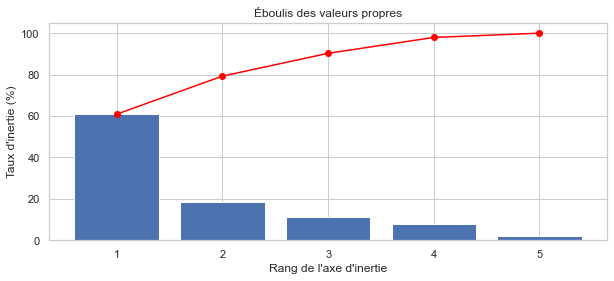

In [33]:
# Confirmation graphique du nombre de clusters à choisir

pevr = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(pevr))+1, pevr)
plt.plot(np.arange(len(pevr))+1, pevr.cumsum(),c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Taux d'inertie (%)")
plt.title("Éboulis des valeurs propres")
plt.show()

Nous pouvons effectivement constater une forte représentation de nos variables sur le premier axe factoriel.

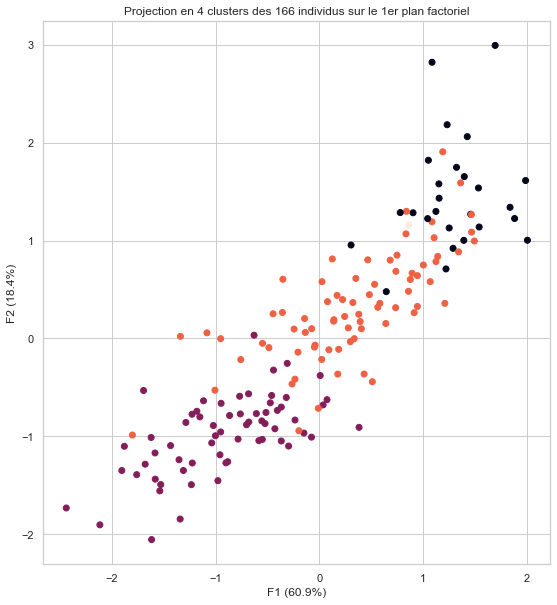

In [34]:
# Projection des données sur le premier plan factoriel

plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=cls4.labels_)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 4 clusters des {} individus sur le 1er plan factoriel".format(X2_trans.shape[0]))

plt.show()

In [35]:
# Tableau des centroïdes dans sa version centrée et réduite (facilitant la comparaison, les dimensions prenant toutes la même importance)

centroids = cls4.cluster_centers_
pd.DataFrame(centroids, columns=data.iloc[:,[0, 1, 2, 4, 5]].columns)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion protéines animales (%),PIB moyen/habitant ($),Quantité moyenne poulets importée ($)
0,1.297155,1.451013,1.073333,1.872180,0.274487
1,-0.914703,-0.983253,-0.940508,-0.596924,-0.185418
2,0.319381,0.320595,0.411465,-0.164120,-0.085660
3,0.861422,1.157241,1.425962,1.835476,11.154556


In [36]:
# Tri des index des clusters et affichage des observations en fonction de leurs classes

ind_sort = np.argsort(cls4.labels_)
data_cls4 = pd.DataFrame(data.index[ind_sort], cls4.labels_[ind_sort]).reset_index()
data_cls4 = data_cls4.rename(columns={'index':'Cluster'})

Maintenant que nous avons nos 4 clusters, joignons les à notre dataframe global.

In [37]:
# Jointure avec notre dataframe de départ

data_cls4 = pd.merge(dispo_pop, data_cls4, on='Zone')
data_cls4.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion protéines animales (%),Taux évolution moyen population (%),PIB moyen/habitant ($),Quantité moyenne poulets importée ($),Région_Afrique,Région_Amérique du nord,Région_Amérique du sud,Région_Asie du Sud,Région_Europe,Région_Europe - UE,Région_Méditerranée orientale,Région_Pacifique occidental,Cluster
0,Afghanistan,1997.0,54.09,19.52,2.98,553.52,9135200.0,0,0,0,0,0,0,1,0,1
1,Afrique du Sud,2987.0,83.36,41.46,1.51,6076.57,7425600.0,1,0,0,0,0,0,0,0,2
2,Albanie,3400.0,119.50,55.50,-0.17,4306.02,5066400.0,0,0,0,0,1,0,0,0,2
3,Algérie,3345.0,92.85,27.68,2.06,4645.34,21107000.0,1,0,0,0,0,0,0,0,2
4,Allemagne,3559.0,104.07,60.61,0.45,44308.71,173673000.0,0,0,0,0,0,1,0,0,0


Nous allons maintenant réaliser un heatmap afin de représenter visuellement les caractéristiques des différents clusters.

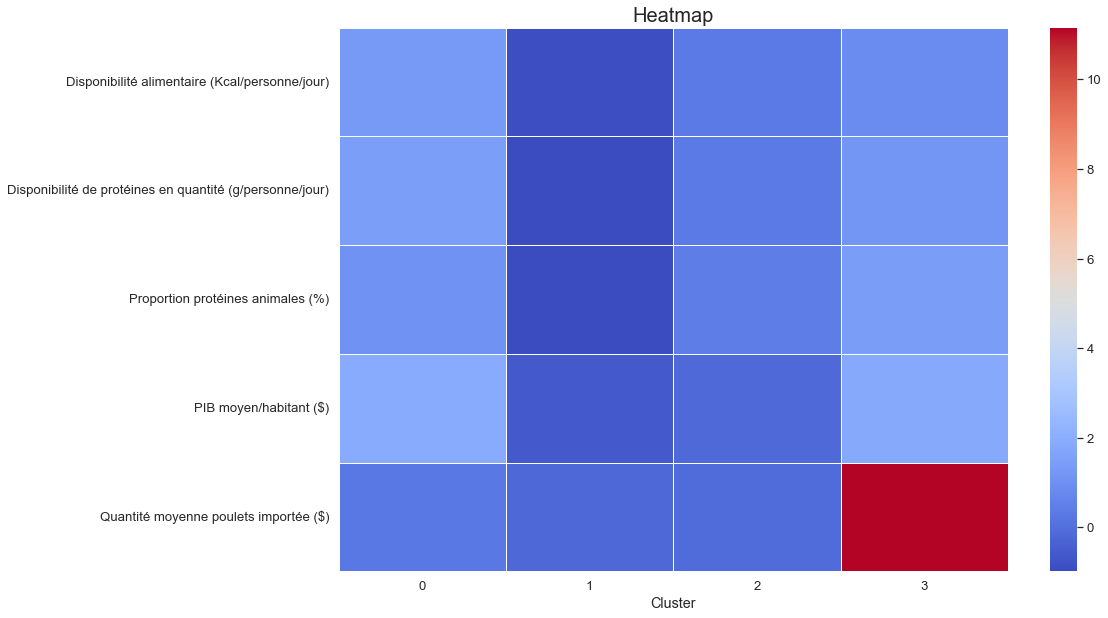

In [38]:
# Heatmap

X2_scaled_df = pd.DataFrame(X2_scaled, index=data_cls4[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Proportion protéines animales (%)', 'PIB moyen/habitant ($)', 'Quantité moyenne poulets importée ($)', 'Cluster']].index, columns = data_cls4[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Proportion protéines animales (%)', 'PIB moyen/habitant ($)', 'Quantité moyenne poulets importée ($)', 'Cluster']].drop(columns = ['Cluster', 'Zone']).columns)
X2_scaled_df['Cluster'] = cls4.labels_
heatmap_df = X2_scaled_df.groupby("Cluster").mean().transpose()
sns.set(font_scale = 1.2)
f, ax = plt.subplots(figsize = (15, 10))
ax.set_title('Heatmap', fontsize = 20)
ax = sns.heatmap(heatmap_df, linewidths = .5, cmap = "coolwarm")

Le *cluster 3* semble comporter les pays ayant les valeurs les plus élevées pour la variable "*Quantité moyenne poulets importée ($)*". Nous allons en réaliser un nouveau en supprimant cette variable afin de mieux voir les caractéristiques des autres clusters.

In [39]:
X2b = data.iloc[:,[0, 1, 2, 4]].values
scaler = preprocessing.StandardScaler()
X2b_scaled = scaler.fit_transform(X2b)

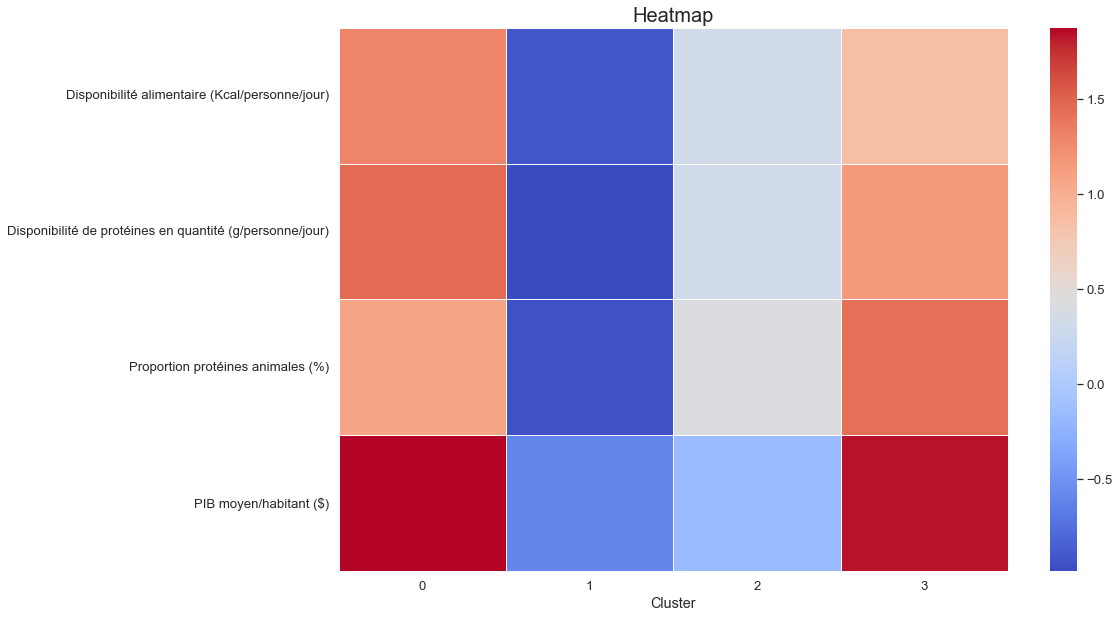

In [40]:
# Heatmap sans les variables régionales

X2b_scaled_df = pd.DataFrame(X2b_scaled, index=data_cls4[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Proportion protéines animales (%)', 'PIB moyen/habitant ($)', 'Cluster']].index, columns = data_cls4.drop(columns = ['Cluster', 'Zone', 'Taux évolution moyen population (%)', 'Quantité moyenne poulets importée ($)', 'Région_Afrique', 'Région_Amérique du nord', 'Région_Amérique du sud', 'Région_Asie du Sud', 'Région_Europe', 'Région_Europe - UE', 'Région_Méditerranée orientale', 'Région_Pacifique occidental']).columns)
X2b_scaled_df['Cluster'] = cls4.labels_
heatmap_dfb = X2b_scaled_df.groupby("Cluster").mean().transpose()
sns.set(font_scale = 1.2)
f, ax = plt.subplots(figsize = (15, 10))
ax.set_title('Heatmap', fontsize = 20)
ax = sns.heatmap(heatmap_dfb, linewidths = .5, cmap = "coolwarm")

Les *clusters 0 et 3* sont composés de pays ayant les valeurs les plus importantes pour chacunes des variables, alors que les valeurs des pays composant les *clusters 1 et 2* sont beaucoup plus faibles.

In [41]:
# Affichage des pays présents dans ces clusters

print(data_cls4[data_cls4['Cluster'] == 0]['Zone'].unique())
print(data_cls4[data_cls4['Cluster'] == 3]['Zone'].unique())

['Allemagne' 'Autriche' 'Belgique' 'Canada' 'Chine - RAS de Hong-Kong'
 'Chine - RAS de Macao' 'Danemark' 'Espagne' 'Finlande' 'France' 'Irlande'
 'Islande' 'Israël' 'Italie' 'Koweït' 'Lituanie' 'Luxembourg' 'Malte'
 'Norvège' 'Nouvelle-Zélande' 'Portugal'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord" 'Suisse' 'Suède'
 'Émirats arabes unis' "États-Unis d'Amérique"]
['Pays-Bas']


In [42]:
# Création d'un dataframe contenant les pays de cette liste
# Suppression de la France

data_cls = data_cls4[(data_cls4['Cluster'] == 0) + (data_cls4['Cluster'] == 3)]
data_cls = data_cls[data_cls['Zone'] != 'France']
data_cls.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion protéines animales (%),Taux évolution moyen population (%),PIB moyen/habitant ($),Quantité moyenne poulets importée ($),Région_Afrique,Région_Amérique du nord,Région_Amérique du sud,Région_Asie du Sud,Région_Europe,Région_Europe - UE,Région_Méditerranée orientale,Région_Pacifique occidental,Cluster
4,Allemagne,3559.0,104.07,60.61,0.45,44308.71,173673000.0,0,0,0,0,0,1,0,0,0
10,Autriche,3694.0,108.11,60.01,0.76,47618.80,30920800.0,0,0,0,0,0,1,0,0,0
15,Belgique,3770.0,101.35,57.11,0.59,44256.59,268269600.0,0,0,0,0,0,1,0,0,0
28,Canada,3492.0,101.33,50.30,1.00,46601.72,42991400.0,0,1,0,0,0,0,0,0,0
30,Chine - RAS de Hong-Kong,3353.0,137.88,73.33,0.76,42759.09,3390000.0,0,0,0,0,0,0,0,1,0


In [43]:
data_cls.shape

(26, 16)

### Comparaison des résultats obtenus

Nous allons maintenant joindre nos 2 dataframes contenant les résultats des 2 méthodes de clustering utilisées afin de ne plus avoir qu'une seule liste de pays.

In [44]:
# Création d'un dataframe contenant les pays communs à data_cls et data_gp3

echantillon = pd.merge(data_cls['Zone'], data_gp34, on='Zone', how='inner')
del echantillon['Groupe']
echantillon.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion protéines animales (%),Taux évolution moyen population (%),PIB moyen/habitant ($),Quantité moyenne poulets importée ($),Région_Afrique,Région_Amérique du nord,Région_Amérique du sud,Région_Asie du Sud,Région_Europe,Région_Europe - UE,Région_Méditerranée orientale,Région_Pacifique occidental
0,Allemagne,3559.0,104.07,60.61,0.45,44308.71,173673000.0,0,0,0,0,0,1,0,0
1,Autriche,3694.0,108.11,60.01,0.76,47618.80,30920800.0,0,0,0,0,0,1,0,0
2,Belgique,3770.0,101.35,57.11,0.59,44256.59,268269600.0,0,0,0,0,0,1,0,0
3,Canada,3492.0,101.33,50.30,1.00,46601.72,42991400.0,0,1,0,0,0,0,0,0
4,Chine - RAS de Hong-Kong,3353.0,137.88,73.33,0.76,42759.09,3390000.0,0,0,0,0,0,0,0,1


In [45]:
echantillon.shape

(22, 15)

In [46]:
pays_commun = [echantillon['Zone'].unique()]
print("Liste des pays communs = " , pays_commun)

Liste des pays communs =  [array(['Allemagne', 'Autriche', 'Belgique', 'Canada',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Danemark',
       'Finlande', 'Irlande', 'Islande', 'Israël', 'Italie', 'Koweït',
       'Luxembourg', 'Norvège', 'Nouvelle-Zélande', 'Pays-Bas',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Suisse',
       'Suède', 'Émirats arabes unis', "États-Unis d'Amérique"],
      dtype=object)]


### Utilisation de l'algorithme des KMeans sur le nouvel échantillon

Notre échantillon étant maintenant nettement réduit, nous allons de nouveau utiliser l'algorithme des KMeans afin d'obtenir une répartition plus précise encore des pays.

In [47]:
# Indexation des 19 pays

echantillon.set_index('Zone', inplace=True)
echantillon.shape

(22, 14)

In [48]:
# Commençons par convertir nos données en array numpy (X3)
# Centrage et réduction des valeurs de X3

X3 = echantillon.iloc[:,:6].values
scaler = preprocessing.StandardScaler()
X3_scaled = scaler.fit_transform(X3)

In [49]:
# Réalisation d'une ACP sur notre échantillon

pcae = PCA(svd_solver='full')
pcae.fit(X3_scaled)

PCA(svd_solver='full')

#### Projection des variables sur le premier plan factoriel

Nous allons, pour simplifier la compréhension de nos résultats, essayer de synthétiser nos variables en les groupant, et ainsi obtenir 2 variables uniques (F1 et F2) qui seront nos composantes principales.

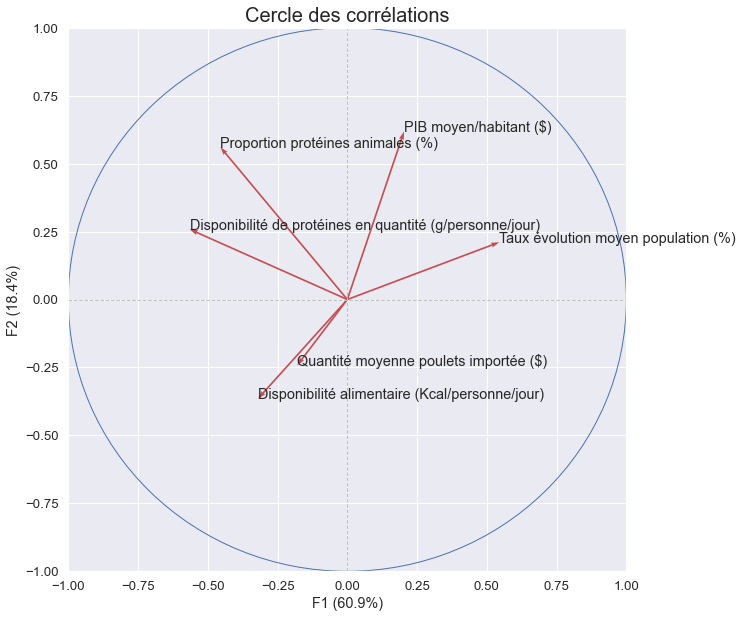

In [50]:
# Réalisation d'un cercle des corrélations des variables de X3_norm

pcs = pcae.components_

fig = plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
           pcs[0,:], pcs[1,:], 
           angles='xy', scale_units='xy', scale=1, color='r', width= 0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, echantillon.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations', fontsize=20)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))

plt.show()

Les variables "*Disponibilité alimentaire (Kcal/personne/jour)*" et "*Quantité moyenne poulets importée ($)*" sont fortement corrélées entre elles.

Ls variables "*Disponibilité de protéines en quantité (g/personne/jour)*" et "*Proportion protéines animales (%)*" sont modérément corrélées entre elles (à confirmer en regardant les cosinus carrés).

Les variables "*Taux évolution moyen population (%)*" et "*PIB moyen/habitant ($)*" sont modérément corrélées entre elles (à confirmer en regardant les cosinus carrés).

In [51]:
# Calcul des composantes principales
# Ici seulement F1 et F2 seront utiles à l'interprétation attendue

X3_trans = pcae.transform(X3_scaled)

echantillon_cp = pd.DataFrame(X3_trans, index=echantillon.index, columns=["F" + str(i+1) for i in range(6)])
echantillon_cp.head()

,F1,F2,F3,F4,F5,F6
Zone,,,,,,
Allemagne,-0.652638,-0.965085,0.682530,0.377234,-0.004932,-0.323790
Autriche,-0.583621,-0.732096,-0.623618,0.719108,-0.046219,-0.436746
Belgique,-0.676073,-1.822842,0.691158,1.357563,0.511953,-0.169731
Canada,0.831542,-1.233645,-0.263123,0.059859,-0.248359,0.241235
Chine - RAS de Hong-Kong,-2.289728,1.483066,-0.649795,-1.400558,0.649769,-0.098298


In [52]:
# Coefficients des composantes principales F1 et F2

F1 = pcae.components_[0]
F2 = pcae.components_[1]
print(F1)
print(F2)

[-0.3202666  -0.56523736 -0.45512199  0.54500028  0.20327329 -0.18015182]
[-0.36500692  0.25833006  0.56069988  0.21076892  0.61822815 -0.24294359]


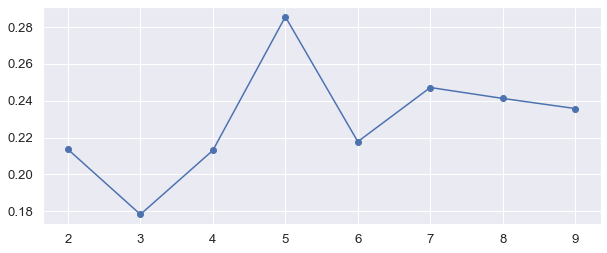

In [53]:
# Établissement du nombre de clusters optimal à l'aide de la métrique "silhouettes" 

silhouettes = [] 
for num_clusters in range(2, 10): 
    cls = KMeans(n_clusters=num_clusters, random_state=1512)  
    cls.fit(X3_scaled)
    silh = metrics.silhouette_score(X3_scaled, cls.labels_)
    silhouettes.append(silh)
    
plt.plot(range(2, 10), silhouettes, marker='o')
plt.show()

Nous devrions choisir *k=4* ou *k=5*. Prenons le parti d'utiliser *k=4*.

In [54]:
# Classifictaion K-Means en 4 clusters

cls4b = KMeans(n_clusters=4)
cls4b.fit(X3_scaled)

KMeans(n_clusters=4)

In [55]:
# Tableau des centroïdes 4 clusters

centroids = cls4b.cluster_centers_
pd.DataFrame(centroids, columns=echantillon.iloc[:,:6].columns)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion protéines animales (%),Taux évolution moyen population (%),PIB moyen/habitant ($),Quantité moyenne poulets importée ($)
0,-0.986298,-0.387051,0.787427,-0.947335,-0.312055,4.068772
1,0.378661,-0.516570,-0.792642,0.009121,-0.578397,0.006340
2,-0.821955,-0.516401,0.386117,0.781643,1.879128,-0.380023
3,0.069643,1.088337,0.799217,-0.324349,-0.202927,-0.373155


In [56]:
# Tri des index des clusters et affichage des observations en fonction de leurs classes

ind_sort = np.argsort(cls4b.labels_)
data_cls4b = pd.DataFrame(echantillon.index[ind_sort], cls4b.labels_[ind_sort]).reset_index()
data_cls4b = data_cls4b.rename(columns={'index':'Cluster'})

In [57]:
# Jointure avec notre dataframe échantillon

data_cls4b = pd.merge(echantillon, data_cls4b, on='Zone')
data_cls4b.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion protéines animales (%),Taux évolution moyen population (%),PIB moyen/habitant ($),Quantité moyenne poulets importée ($),Région_Afrique,Région_Amérique du nord,Région_Amérique du sud,Région_Asie du Sud,Région_Europe,Région_Europe - UE,Région_Méditerranée orientale,Région_Pacifique occidental,Cluster
0,Allemagne,3559.0,104.07,60.61,0.45,44308.71,173673000.0,0,0,0,0,0,1,0,0,1
1,Autriche,3694.0,108.11,60.01,0.76,47618.80,30920800.0,0,0,0,0,0,1,0,0,1
2,Belgique,3770.0,101.35,57.11,0.59,44256.59,268269600.0,0,0,0,0,0,1,0,0,1
3,Canada,3492.0,101.33,50.30,1.00,46601.72,42991400.0,0,1,0,0,0,0,0,0,1
4,Chine - RAS de Hong-Kong,3353.0,137.88,73.33,0.76,42759.09,3390000.0,0,0,0,0,0,0,0,1,3


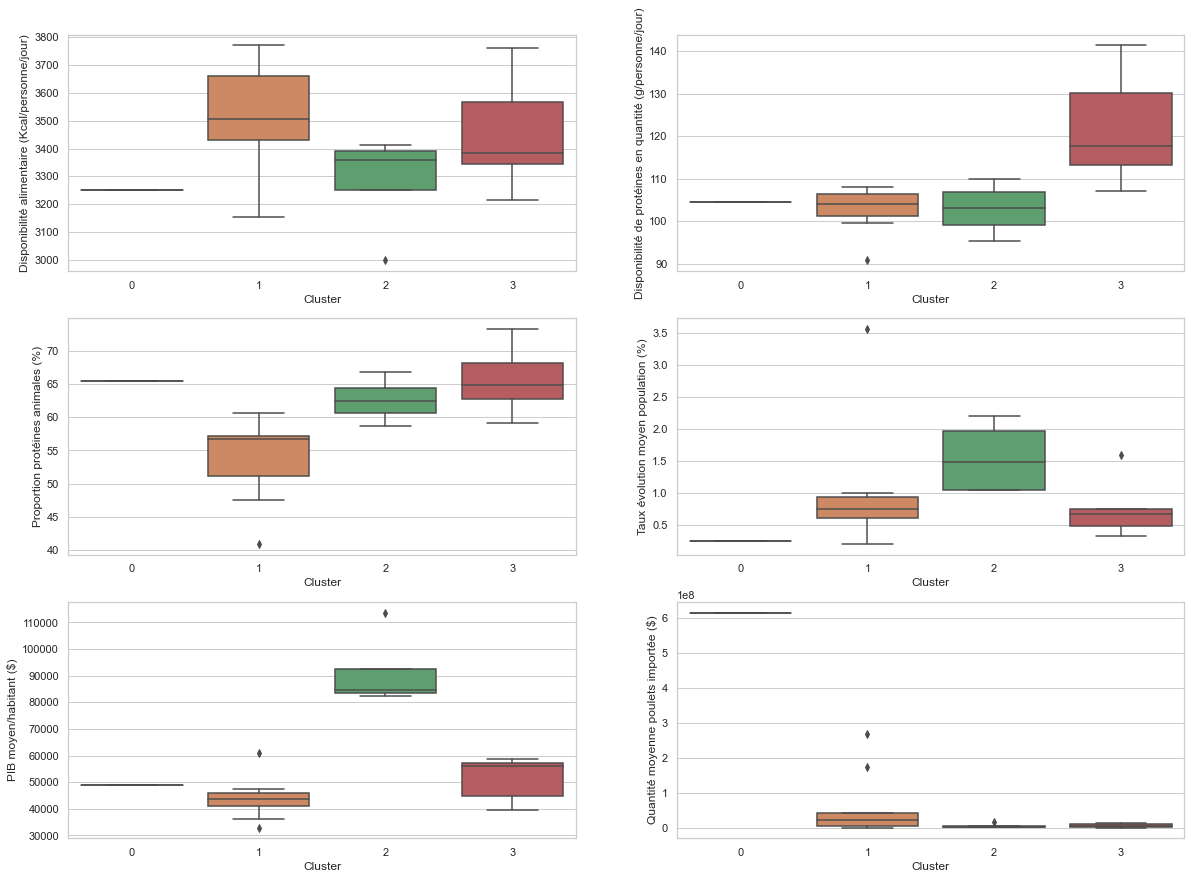

In [58]:
# Réalisation de boxplots afin de visualiser la répartition des classes

plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(421)
sns.boxplot(data=data_cls4b, x='Cluster', y='Disponibilité alimentaire (Kcal/personne/jour)')

plt.subplot(422)
sns.boxplot(data=data_cls4b, x='Cluster', y='Disponibilité de protéines en quantité (g/personne/jour)')

plt.subplot(423)
sns.boxplot(data=data_cls4b, x='Cluster', y='Proportion protéines animales (%)')

plt.subplot(424)
sns.boxplot(data=data_cls4b, x='Cluster', y='Taux évolution moyen population (%)')

plt.subplot(425)
sns.boxplot(data=data_cls4b, x='Cluster', y='PIB moyen/habitant ($)')

plt.subplot(426)
sns.boxplot(data=data_cls4b, x='Cluster', y='Quantité moyenne poulets importée ($)')

plt.show(block=False)

Réalisons des tests statistiques afin de voir quelles variables influencent la composition des groupes. Utilisons pour ce faire l'analyse des variances ou ANOVA.

**H0 :** les moyennes des variances de tous les groupes sont égales.

**H1 :** la moyenne de la variance d'au moins l'un des groupe diffère.

In [59]:
f_oneway(data_cls4b[data_cls4b.Cluster == 0]['Disponibilité alimentaire (Kcal/personne/jour)'], data_cls4b[data_cls4b.Cluster == 1]['Disponibilité alimentaire (Kcal/personne/jour)'], data_cls4b[data_cls4b.Cluster == 2]['Disponibilité alimentaire (Kcal/personne/jour)'], data_cls4b[data_cls4b.Cluster == 3]['Disponibilité alimentaire (Kcal/personne/jour)'])

F_onewayResult(statistic=1.8305832100632895, pvalue=0.17773536852135033)

La pvalue étant supérieure à 0.05, nous pouvons accepter H0 et admettre, par conséquent, que la composition des groupes est corrélée à la variable "*Disponibilité alimentaire (Kcal/personne/jour)*".

In [60]:
f_oneway(data_cls4b[data_cls4b.Cluster == 0]['Disponibilité de protéines en quantité (g/personne/jour)'], data_cls4b[data_cls4b.Cluster == 1]['Disponibilité de protéines en quantité (g/personne/jour)'], data_cls4b[data_cls4b.Cluster == 2]['Disponibilité de protéines en quantité (g/personne/jour)'], data_cls4b[data_cls4b.Cluster == 3]['Disponibilité de protéines en quantité (g/personne/jour)'])

F_onewayResult(statistic=7.43686654082104, pvalue=0.0019224950640759745)

La pvalue étant nettement inférieure à 0.05, nous pouvons rejeter H0 et admettre, par conséquent, que pour au moins l'un des groupes, sa composition n'est pas corrélée à la variable "*Disponibilité de protéines en quantité (g/personne/jour)*".

In [61]:
f_oneway(data_cls4b[data_cls4b.Cluster == 0]['Proportion protéines animales (%)'], data_cls4b[data_cls4b.Cluster == 1]['Proportion protéines animales (%)'], data_cls4b[data_cls4b.Cluster == 2]['Proportion protéines animales (%)'], data_cls4b[data_cls4b.Cluster == 3]['Proportion protéines animales (%)'])

F_onewayResult(statistic=7.161084197191334, pvalue=0.002300522289853399)

La pvalue étant inférieure à 0.05, nous pouvons rejeter H0 et admettre, par conséquent, que pour au moins l'un des groupes, sa composition n'est pas corrélée à la variable "*Proportion protéines animales (%)*".

In [62]:
f_oneway(data_cls4b[data_cls4b.Cluster == 0]['Taux évolution moyen population (%)'], data_cls4b[data_cls4b.Cluster == 1]['Taux évolution moyen population (%)'], data_cls4b[data_cls4b.Cluster == 2]['Taux évolution moyen population (%)'], data_cls4b[data_cls4b.Cluster == 3]['Taux évolution moyen population (%)'])

F_onewayResult(statistic=1.36547712370711, pvalue=0.28513732443273665)

La pvalue étant nettement supérieure à 0.05, nous pouvons accepter H0 et admettre, par conséquent, que la composition des groupes est corrélée à la variable "*Taux évolution moyen population (%)*".

In [63]:
f_oneway(data_cls4b[data_cls4b.Cluster == 0]['PIB moyen/habitant ($)'], data_cls4b[data_cls4b.Cluster == 1]['PIB moyen/habitant ($)'], data_cls4b[data_cls4b.Cluster == 2]['PIB moyen/habitant ($)'], data_cls4b[data_cls4b.Cluster == 3]['PIB moyen/habitant ($)'])

F_onewayResult(statistic=25.849906513078707, pvalue=9.595152745407899e-07)

La pvalue étant nettemenet inférieure à 0.05, nous pouvons rejeter H0 et admettre, par conséquent, que pour au moins l'un des groupes, sa composition n'est pas corrélée à la variable "*PIB moyen/habitant ($)*".

In [64]:
f_oneway(data_cls4b[data_cls4b.Cluster == 0]['Quantité moyenne poulets importée ($)'], data_cls4b[data_cls4b.Cluster == 1]['Quantité moyenne poulets importée ($)'], data_cls4b[data_cls4b.Cluster == 2]['Quantité moyenne poulets importée ($)'], data_cls4b[data_cls4b.Cluster == 3]['Quantité moyenne poulets importée ($)'])

F_onewayResult(statistic=27.913009203328482, pvalue=5.487972116999006e-07)

La pvalue étant nettement inférieure à 0.05, nous pouvons rejeter H0 et admettre, par conséquent, que pour au moins l'un des groupes, sa composition n'est pas corrélée à la variable "*Quantité moyenne poulets importée ($)*".

In [65]:
# Il semblerait que le cluster 2 ne soit composé que de très peu de pays par rapport aux autres clusters 
# Vérification de la composition de chacun des clusters

print("Le cluster numéro 0 est composé du/des " + str(len(data_cls4b[data_cls4b['Cluster'] == 0]['Zone'])) + " pays suivant(s) : \n" + str(data_cls4b[data_cls4b['Cluster'] == 0]['Zone'].unique()))
print("Le cluster numéro 1 est composé du/des " + str(len(data_cls4b[data_cls4b['Cluster'] == 1]['Zone'])) + " pays suivant(s) : \n" + str(data_cls4b[data_cls4b['Cluster'] == 1]['Zone'].unique()))
print("Le cluster numéro 2 est composé du/des " + str(len(data_cls4b[data_cls4b['Cluster'] == 2]['Zone'])) + " pays suivant(s) : \n" + str(data_cls4b[data_cls4b['Cluster'] == 2]['Zone'].unique()))
print("Le cluster numéro 3 est composé du/des " + str(len(data_cls4b[data_cls4b['Cluster'] == 3]['Zone'])) + " pays suivant(s) : \n" + str(data_cls4b[data_cls4b['Cluster'] == 3]['Zone'].unique()))

Le cluster numéro 0 est composé du/des 1 pays suivant(s) : 
['Pays-Bas']
Le cluster numéro 1 est composé du/des 10 pays suivant(s) : 
['Allemagne' 'Autriche' 'Belgique' 'Canada' 'Irlande' 'Italie' 'Koweït'
 'Nouvelle-Zélande' "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
 'Émirats arabes unis']
Le cluster numéro 2 est composé du/des 4 pays suivant(s) : 
['Chine - RAS de Macao' 'Luxembourg' 'Norvège' 'Suisse']
Le cluster numéro 3 est composé du/des 7 pays suivant(s) : 
['Chine - RAS de Hong-Kong' 'Danemark' 'Finlande' 'Islande' 'Israël'
 'Suède' "États-Unis d'Amérique"]


In [66]:
# Représentation des clusters surr le premier plan factoriel

print(pcae.explained_variance_ratio_.cumsum())

[0.29405566 0.55637744 0.75472267 0.87331466 0.96687751 1.        ]


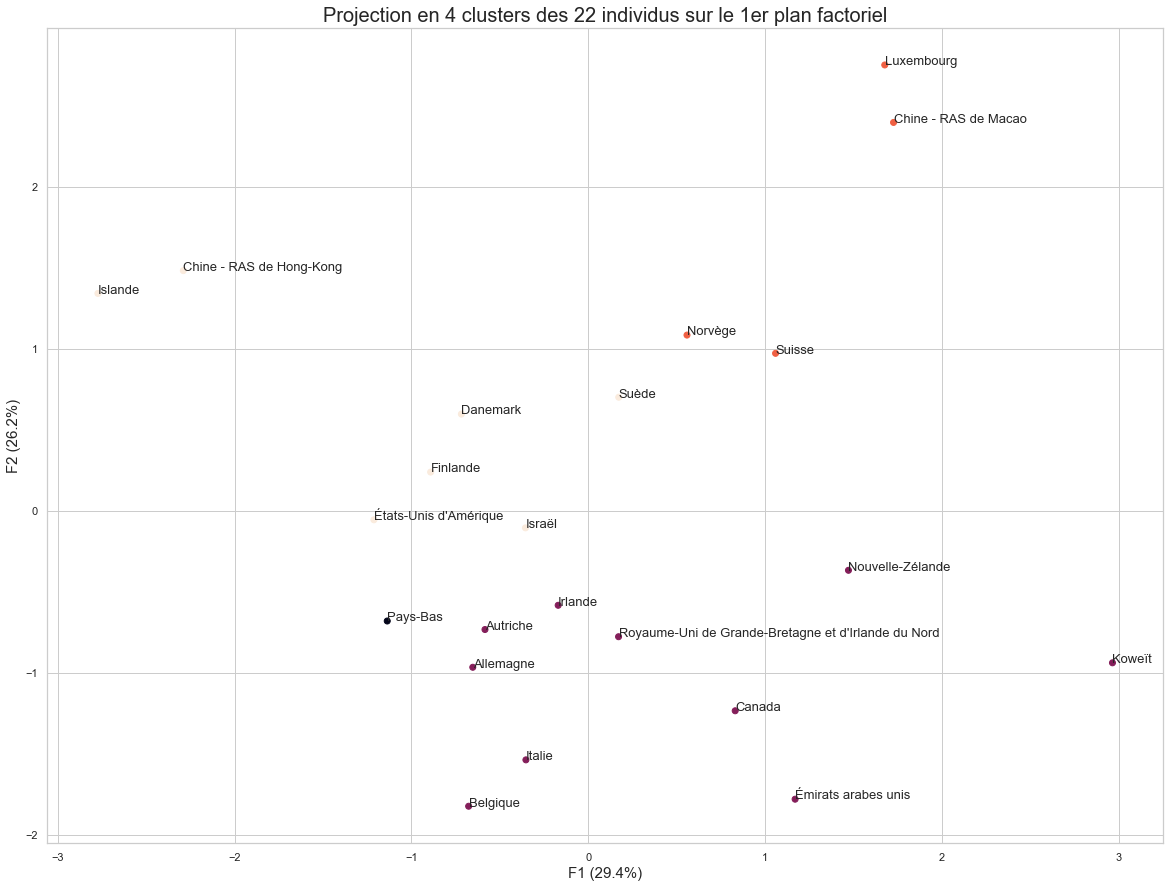

In [67]:
# 56% de la variance est expliquée par ses deux premières composantes
# Projection des 4 clusters sur le premier plan factoriel (F1, F2)
# Coordonnées factorielles 

X3_trans = pcae.transform(X3_scaled)
plt.figure(figsize=(20, 15))

plt.scatter(X3_trans[:, 0], X3_trans[:, 1], c=cls4b.labels_)
for i,(x,y) in enumerate(X3_trans[:,[0,1]]):
                    plt.text(x, y, echantillon.index[i], fontsize='13') 

plt.xlabel('F{} ({}%)'.format(1, round(100*pcae.explained_variance_ratio_[0],1)), fontsize=15)
plt.ylabel('F{} ({}%)'.format(2, round(100*pcae.explained_variance_ratio_[1],1)), fontsize=15)
plt.title("Projection en 4 clusters des {} individus sur le 1er plan factoriel".format(X3_trans.shape[0]), fontsize=20)
plt.show()

In [68]:
# Affichage des pays les plus contributeurs 

di = np.sum(X3_scaled**2,axis=1)
ctr_indiv_inertie = pd.DataFrame(di, index=echantillon.index, columns=['d_i']).sort_values(by='d_i', ascending=False)
ctr_indiv_inertie

,d_i
Zone,
Pays-Bas,19.292363
Koweït,16.581264
Luxembourg,12.737943
Islande,11.467344
Chine - RAS de Macao,10.350194
Chine - RAS de Hong-Kong,10.257999
Émirats arabes unis,7.710088
Belgique,6.391411
Nouvelle-Zélande,5.369263
